# Regression Mini Project

# Store Sales Prediction

The success of any retail store depends upon its sales. More the sales made, more is the revenue. With 
a good customer service and care, the customer too enjoys a good shopping experience. This will lead 
to more in-flow of customers, opening more store branches across a city / country.
To enable this, store owners rely heavily on past data to predict future sales. This will help them in 
strategizing their business models and come up with innovative techniques and ideas to attract 
customers and set realistic goals.
Many medium to large stores implement this kind of analytics to understand trends like which products 
are getting sold faster, what are the slow moving products, impact of store types, etc. With new 
branches of the store, the analysis can get more complex and may also involve stiff competition from 
other competitors

## Business Objective
- Build a model to predict the Sales of a store

### Importing Required Libraries

In [1]:
import pandas as pd                                                  # for working with dataframes
import numpy as np                                                   # for working with arrays
import matplotlib.pyplot as plt                                      # for visualizations
import seaborn as sb                                                 # for visualizations
from tabulate import tabulate                                        # for tabulations

from sklearn import preprocessing                                    # for preprocessing datas
from sklearn.preprocessing import StandardScaler,MinMaxScaler        # for data scaling
from sklearn.model_selection import train_test_split                 # for data splitting
from sklearn.linear_model import LinearRegression                    # for linear regression model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error    # for evaluation metrics
from sklearn.tree import DecisionTreeRegressor                                           # for decision tree regressor model 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,StackingRegressor   # for ensemble models
from sklearn.model_selection import KFold                                                # for data splitting
from sklearn.model_selection import cross_validate                                       # for cross validation
from sklearn.model_selection import GridSearchCV                                         # for hyperparameter tuning

import warnings
warnings.filterwarnings('ignore')                                       # to ignore warnings

### Loading the Dataset

In [2]:
df = pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN


**Data Dictionary**:
- **Item_Identifier**: Unique Product ID
- **Item_weight**: Weight of the product
- **Item_Fat_Content**: Total fat content in the product
- **Item_Visibility**: How visible is the product in the store
- **Item_Type**: Product category of the selected product
- **Item_MRP**: Product cost
- **Outlet_Identifier**: The Store ID
- **Outlet_Establishment_Year**: The year when the store was opened
- **Outlet_Size**: Size of the store
- **Outlet_Location_Type**: Location type where the store is located
- **Outlet_Type**: The type of store
- **Item_Outlet_Sales**: Sales made by the store outlet. *(Target)*

### Shape of Dataset

In [4]:
print('Shape   :',df.shape)
print('Rows    :',df.shape[0])
print('Columns :',df.shape[1])

Shape   : (14204, 12)
Rows    : 14204
Columns : 12


### Information of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


The dataset contains 5 numerical columns and 7 categorical columns. 

### Summary of Dataset

In [6]:
# Numerical
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# Categorical
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,14204,14204,14204,14204,14204,14204,14204
unique,1559,2,16,10,3,3,4
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Small,Tier 3,Supermarket Type1
freq,10,9185,2013,1559,7071,5583,9294


### Data Types of Dataset

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Seggregation of Qualitative & Quantitative data

In [9]:
a = df.select_dtypes(exclude='object')
b = df.select_dtypes(include='object')

a_lst = list(a.columns)
b_lst = list(b.columns)
table = [a_lst,b_lst]

print(tabulate({'Categorical':b_lst,
                 'Continuous':a_lst}, headers=['Categorical','Numerical']))

Categorical           Numerical
--------------------  -------------------------
Item_Identifier       Item_Weight
Item_Fat_Content      Item_Visibility
Item_Type             Item_MRP
Outlet_Identifier     Outlet_Establishment_Year
Outlet_Size           Item_Outlet_Sales
Outlet_Location_Type
Outlet_Type


### Checking for Missing Values

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [11]:
# Ratio of missing values
(df.isna().sum()/df.shape[0])*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

**There are more than 30 percent of Missing values in the Item_Outlet_Sales column.**

### Outlier Check in Dependent Column

<AxesSubplot:xlabel='Item_Outlet_Sales'>

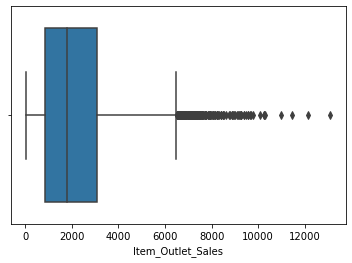

In [12]:
sb.boxplot(df['Item_Outlet_Sales'])

**Outliers are present in the Item_Outlet_Sales column which is the dependent column that is to be predicted**

### Missing Value Imputation

- As there are missing values in the Item_Outlet_Sales column we have to impute those values in order to proceed with our analysis.
- There are also outliers present in the column.
- We can fill those missing values with the median value of the Item_Outlet_sales of each Item_Type in respect to the Outlet_Types.

In [13]:
# to display max rows of output
pd.set_option('display.max_rows',100) 

In [14]:
# checking the average item sales in each outlet types
pt = pd.pivot_table(df,values='Item_Outlet_Sales',index=['Outlet_Type','Item_Type',],aggfunc='median')
pt

Item_Outlet_Sales
Outlet_Type       Item_Type                               
Grocery Store     Baking Goods                    223.7088
                  Breads                          329.5710
                  Breakfast                       352.8740
                  Canned                          285.6282
                  Dairy                           263.9897
                  Frozen Foods                    229.0352
                  Fruits and Vegetables           248.3434
                  Hard Drinks                     145.8102
                  Health and Hygiene              264.9884
                  Household                       296.2810
                  Meat                            284.2966
                  Others                          214.3876
                  Seafood                         179.4331
                  Snack Foods                     309.5970
                  Soft Drinks                     288.2914
                  Starchy Foods                   185.0924
Supermarket Type1 Baking Goods                   1764.7029
                  Breads                         1980.7550
                  Breakfast                      1877.8889
                  Canned                         2032.0216
                  Dairy                          1940.1412
                  Frozen Foods                   1853.5872
                  Fruits and Vegetables          2050.6640
                  Hard Drinks                    1829.6184
                  Health and Hygiene             1950.7940
                  Household                      2245.0776
                  Meat                           2014.7108
                  Others                         2120.5730
                  Seafood                        2582.6382
                  Snack Foods                    2087.2830
                  Soft Drinks                    1709.7744
                  Starchy Foods                  2232.4274
Supermarket Type2 Baking Goods                   1538.3309
                  Breads                         1428.1410
                  Breakfast                      1215.0850
                  Canned                         1528.3439
                  Dairy                          1571.2880
                  Frozen Foods                   1648.8537
                  Fruits and Vegetables          1593.9252
                  Hard Drinks                    2167.5119
                  Health and Hygiene             1592.5936
                  Household                      1749.7224
                  Meat                           1762.3726
                  Others                         1613.8992
                  Seafood                        2600.6148
                  Snack Foods                    1871.5638
                  Soft Drinks                    1488.0630
                  Starchy Foods                  1656.5104
Supermarket Type3 Baking Goods                   3146.5708
                  Breads                         3237.1196
                  Breakfast                      3866.9664
                  Canned                         3460.1626
                  Dairy                          3435.5280
                  Frozen Foods                   3057.3536
                  Fruits and Vegetables          3996.7974
                  Hard Drinks                    3195.8400
                  Health and Hygiene             3019.4030
                  Household                      3419.5488
                  Meat                           3300.0377
                  Others                         2348.9424
                  Seafood                        1833.6132
                  Snack Foods                    3523.4136
                  Soft Drinks                    2694.4926
                  Starchy Foods                  3836.6725

In [15]:
df[df.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [16]:
# Imputation of Missing values

df['Item_Outlet_Sales'].fillna(df.groupby(['Outlet_Type','Item_Type'])['Item_Outlet_Sales'].transform('median'), inplace = True)

In [17]:
# Checking whether the missing values are imputed.
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.074402,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [19]:
# just checking one of the missing value of the imputed value
df.loc[8523,:]

Item_Identifier                          FDW58
Item_Weight                              20.75
Item_Fat_Content                       Low Fat
Item_Visibility                       0.007565
Item_Type                          Snack Foods
Item_MRP                              107.8622
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 1999
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                     2087.283
Name: 8523, dtype: object

### Visualizations

### Sales in Outlet Types

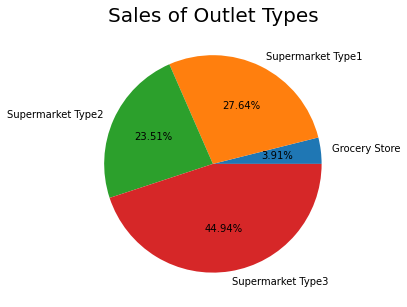

In [20]:
# Sales done in Each Outlets
data = df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()

plt.figure(figsize=(10,5))
plt.pie(data.values,data=df,labels=data.index,autopct='%.2f%%')
plt.title('Sales of Outlet Types',fontsize=20)
plt.show()

**Interpretation**: 
- Sales of Items are more in Supermarket Type 3 with 44.94% comparing to other outlet types.
- Sales of Items are least in Grocery Store with only 3.91% of overall Sales.

### Overall Sales of Each Items in Market 

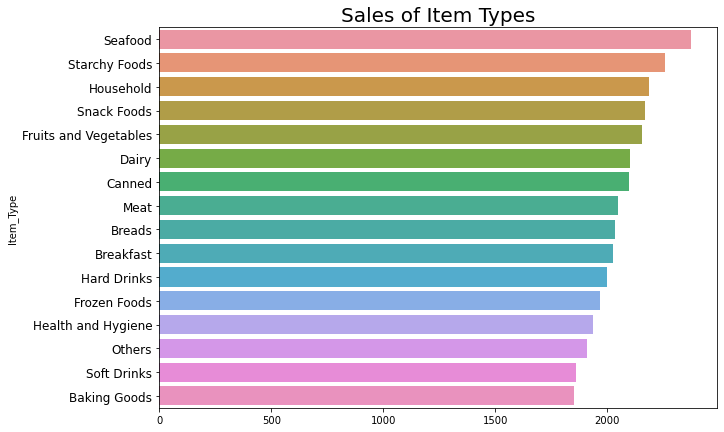

In [21]:
data = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
data = data.sort_values(ascending=False)

plt.figure(figsize=(10,7))
sb.barplot(y=data.index,x=data.values)
plt.title('Sales of Item Types',fontsize=20)
plt.yticks(fontsize=12)
plt.show()

**Interpretation**:
- Sales of Seafood is more in the markets than other items.
- Second Highest Sales is by Starchy Food Items.
- Items like Snack foods, Dairy, Fruits and vegetables and Households are also having good sales in the markets.
- Baking goods has the least sales compared to the other item types.

### Sales of Fat content items

In [22]:
data = pd.pivot_table(df,values='Item_Outlet_Sales',index='Item_Fat_Content',aggfunc='mean')
data

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2055.083071
Regular,2084.581131


**Interpretation**: The Average Sales of Regular fat items is higher that low fat items.

### Distribution of Sales of each Outlet Types

Text(0.5, 1.0, 'Grocery Store')

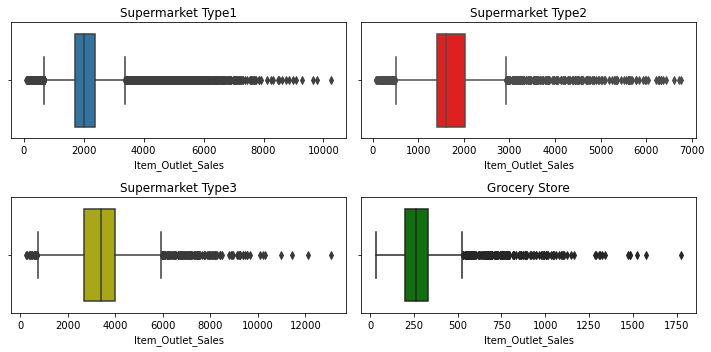

In [23]:
ax,fig = plt.subplots(2,2,figsize=(10,5),tight_layout=True)
plt.subplot(2,2,1)
sb.boxplot(df['Item_Outlet_Sales'][df['Outlet_Type']=='Supermarket Type1'])
plt.title('Supermarket Type1')

plt.subplot(2,2,2)
sb.boxplot(df['Item_Outlet_Sales'][df['Outlet_Type']=='Supermarket Type2'],color='r')
plt.title('Supermarket Type2')

plt.subplot(2,2,3)
sb.boxplot(df['Item_Outlet_Sales'][df['Outlet_Type']=='Supermarket Type3'],color='y')
plt.title('Supermarket Type3')

plt.subplot(2,2,4)
sb.boxplot(df['Item_Outlet_Sales'][df['Outlet_Type']=='Grocery Store'],color='g')
plt.title('Grocery Store')

**Interpretation**:
- Most sales of Supermarket type 1 ranges between 1500 to 2500.
- Most sales of Supermarket type 2 ranges between 1500 to 2000.
- Most sales of Supermarket type 3 ranges between 3000 to 4000.
- Most sales of Grocery Store ranges between 200 to 350.
- There are outliers in sales of all supermarkets and grocery store.

### Most Popular Item:

In [24]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

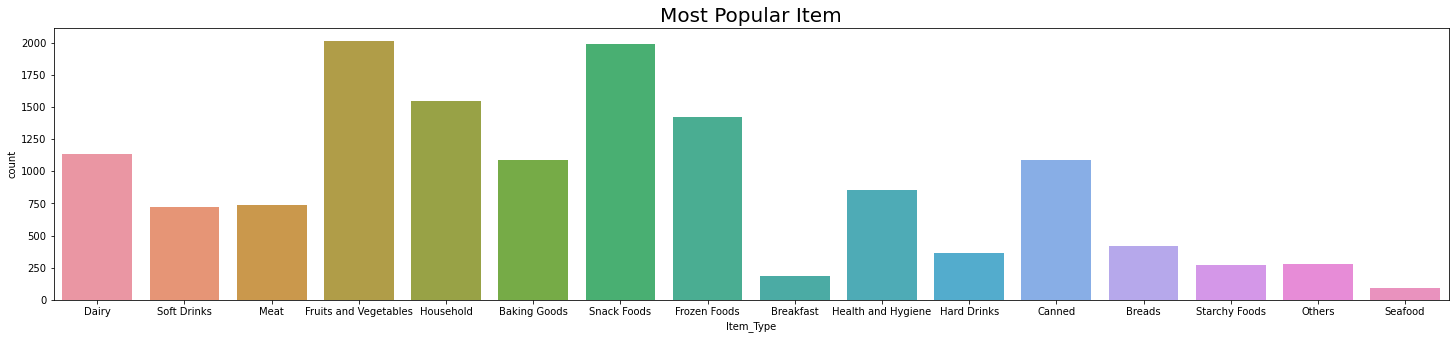

In [25]:
plt.figure(figsize=(25,5))
sb.countplot(df['Item_Type'])
plt.title('Most Popular Item',fontsize=20)
plt.show()

**Interpretation**: 
- Fruits and vegetables is the most popular item in the markets.
- The second most popular item is the Snack foods.
- The Seafood is the least popular but the Sales price of it is the highest when compared to the other item types.

### Sales over Outlet Establishment Years

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

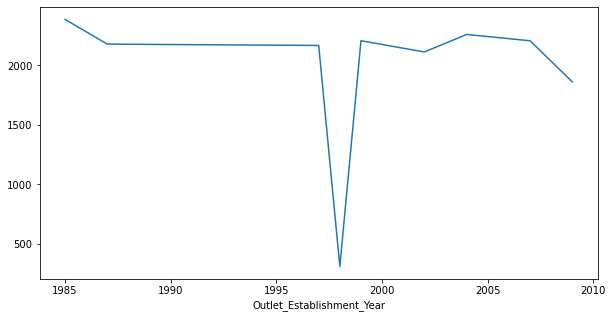

In [26]:
data = df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].mean()

plt.figure(figsize=(10,5))
data.plot()

**Interpretation**: 
- The Sales has a drastic fall between the years of 1995 to 2000.

### Item Visiblity and its Sales in the Markets

In [27]:
pd.pivot_table(values=['Item_Visibility','Item_Outlet_Sales'],index=['Item_Type'],aggfunc='mean',data=df)

,Item_Outlet_Sales,Item_Visibility
Item_Type,,
Baking Goods,1853.406956,0.073074
Breads,2034.673597,0.073498
Breakfast,2026.573495,0.085882
Canned,2096.811495,0.071727
Dairy,2103.175751,0.075403
Frozen Foods,1970.072318,0.071720
Fruits and Vegetables,2155.437371,0.073110
Hard Drinks,1999.642937,0.070340
Health and Hygiene,1935.516296,0.060995


**Interpretation**:
- The avg visibility of breakfast is more but the sales is moderate.
- Seafood which has high avg sales in the markets have a good visibility in the markets.

### Converting Non numeric dtypes to Categorical and Label encoding them

In [28]:
df1 = df.select_dtypes(include='object')
label_encoder = preprocessing.LabelEncoder()

for col in df1.columns:
    df[col] = df[col].astype('category')                      # converting to category type
    df[col+'_encode'] = label_encoder.fit_transform(df[col])  # label encoding
    
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encode,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,0,4,9,1,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,1,14,3,1,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,0,10,9,1,0,1
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1121,1,6,0,1,2,0
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,0,9,1,0,2,1


### Feature Selection

<AxesSubplot:>

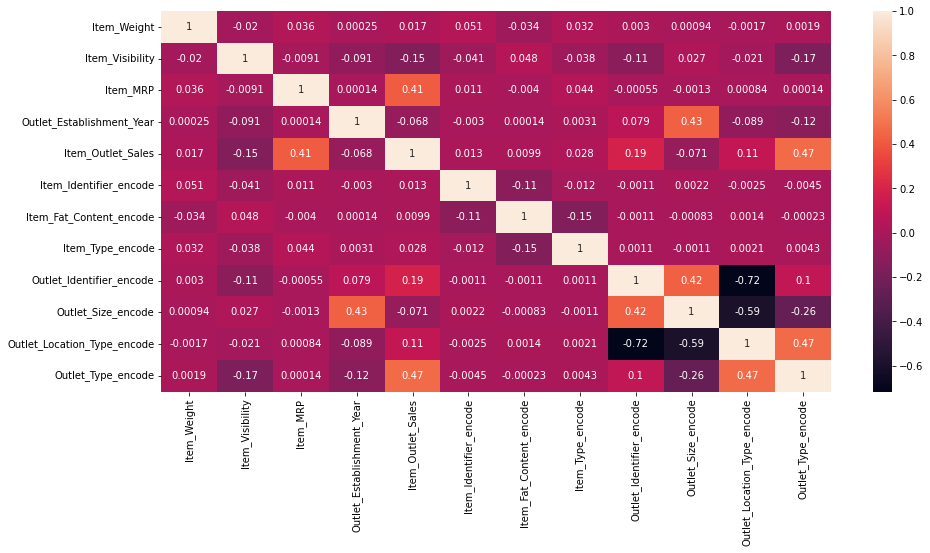

In [29]:
# Heatmap
cor = df.corr()
plt.figure(figsize=(15,7))
sb.heatmap(cor,annot=True)

In [31]:
# Checking correlation with dependent column
cor = abs(df.corr())
cor['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales              1.000000
Outlet_Type_encode             0.467708
Item_MRP                       0.412445
Outlet_Identifier_encode       0.187744
Item_Visibility                0.148919
Outlet_Location_Type_encode    0.105687
Outlet_Size_encode             0.070887
Outlet_Establishment_Year      0.067817
Item_Type_encode               0.027525
Item_Weight                    0.016982
Item_Identifier_encode         0.013326
Item_Fat_Content_encode        0.009932
Name: Item_Outlet_Sales, dtype: float64

**Interpretation**:The columns with good correlation with Item_Outlet_Sales include Item_MRP,Outlet_Type_encode,Outlet_Identifier_encode.

### Data Splitting

In [84]:
X = df[['Item_MRP','Outlet_Type_encode','Outlet_Identifier_encode','Outlet_Location_Type_encode']]
y = df['Item_Outlet_Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [33]:
print('X_train :',X_train.shape)
print('X_test  :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test  :',y_test.shape)

X_train : (9942, 4)
X_test  : (4262, 4)
y_train : (9942,)
y_test  : (4262,)


**Data is splitted using train_test_split method.**

### Feature Scaling

In [34]:
# data scaling
#numerics = ['int16','int32','int64','float16','float32','float64']
scaler = StandardScaler()   # standardizing
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#df_2 = df.select_dtypes(include=numerics)

#df_scaled = pd.DataFrame(scaler.fit_transform(df_2.to_numpy()),columns=df_2.columns)  # creating dataframe with scaled values
#df_scaled.head()

**Data is scaled using Standard scaler**

# REGRESSION MODELS

## Linear Regression 

### Model Building & Fitting

In [35]:
# Building the model
lr_model = LinearRegression()

In [36]:
# Fitting the train datas to the model
lr_model.fit(X_train,y_train)

LinearRegression()

### Predictions

In [37]:
# Predicting the unseen data using x test
lr_pred = lr_model.predict(X_test)
lr_pred

array([1397.55063811, 1812.46777352, 1916.33171039, ..., 2430.99256255,
       3336.03394408, 2707.36783841])

### Performance Check

In [38]:
# Performance of training data and testing data
lr_train = lr_model.score(X_train,y_train)
lr_test = lr_model.score(X_test,y_test)

print(f'Performance of Training dataset: {np.round(lr_train*100,2)} %')
print(f'Performance of Testing dataset : {np.round(lr_test*100,2)} %')

Performance of Training dataset: 40.74 %
Performance of Testing dataset : 41.1 %


### Evaluation Metrics

In [39]:
MSE = np.round(mean_squared_error(y_test, lr_pred)*100)
RMSE = np.round(mean_squared_error(y_test, lr_pred, squared=False)*100)
MAE = np.round(mean_absolute_error(y_test,lr_pred)*100)
MAPE = np.round(mean_absolute_percentage_error(y_test,lr_pred))
r2 = np.round(r2_score(y_test,lr_pred)*100)

print(f'MSE  : {MSE} %')
print(f'RMSE : {RMSE} %')
print(f'MAE  : {MAE} %')
print(f'MAPE : {MAPE}%')
print(f'R_2  : {r2} %')

MSE  : 130111260.0 %
RMSE : 114066.0 %
MAE  : 82250.0 %
MAPE : 1.0%
R_2  : 41.0 %


### Plot

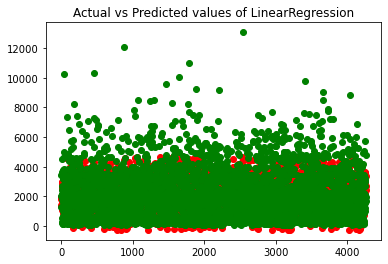

In [40]:
# Plot
a = np.arange(0,len(lr_pred))

plt.scatter(a,lr_pred,color='r')
plt.scatter(a,y_test,color='g')
plt.title('Actual vs Predicted values of LinearRegression')
plt.show()

**Most y_test values doesnot collide with the predicted values i.e the error difference is more.**

**Interpretation**:
- To predict the Sales data we first try with the Linear Regression Model for the data.
- The performances of train and test is about 40.74% and 41.1%.
- The errors are also high for this model.

## Decision Tree Regressor

### Model Building

In [41]:
dtm = DecisionTreeRegressor(max_depth=3,
                           min_samples_split=5,
                           max_leaf_nodes=10)


### Fitting the model

In [42]:
dtm.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=10, min_samples_split=5)

### Predicting the model

In [43]:
dtm_pred = dtm.predict(X_test)
dtm_pred

array([1625.46570609, 1625.46570609, 2648.52103792, ..., 2648.52103792,
       2648.52103792, 2648.52103792])

### Performance Check

In [44]:
dtm_train = dtm.score(X_train,y_train)
dtm_test = dtm.score(X_test,y_test)

print(f"Performance of train dataset = {np.round(dtm_train*100)} %")
print(f"Performance of test dataset  = {np.round(dtm_test*100)} %")

Performance of train dataset = 46.0 %
Performance of test dataset  = 46.0 %


### Evaluation Metrics

In [45]:
MSE1 = mean_squared_error(y_test, dtm_pred)
RMSE1 = mean_squared_error(y_test, dtm_pred, squared=False)
MAE1 = mean_absolute_error(y_test,dtm_pred)
MAPE1 = mean_absolute_percentage_error(y_test,dtm_pred)
r2_dtm = r2_score(y_test,dtm_pred)

print(f'MSE  : {np.round(MSE1*100,2)} %')
print(f'RMSE : {np.round(RMSE1*100,2)} %')
print(f'MAE  : {np.round(MAE1*100,2)} %')
print(f'MAPE : {MAPE}')
print(f'R_2  : {np.round(r2_dtm*100,2)} %')

MSE  : 120169331.32 %
RMSE : 109621.77 %
MAE  : 76137.45 %
MAPE : 1.0
R_2  : 45.6 %


**To improve our performance we can do hyperparameter tuning to get the best parameter to get good performance**

## Using Grid Search to find best parameters (Hyperparameter Tuning)

In [46]:
# Grid Search 
# Setting parameters for grid search
params = {
          'max_depth':[6,8,10,12,14,16],
          'min_samples_split':[5,10,15,20],
          'max_leaf_nodes':[10,20,30,40]
}

In [47]:
grid_search = GridSearchCV(estimator=dtm,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="r2")

In [48]:
# Fitting train datas to Grid search model
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeRegressor(max_depth=3, max_leaf_nodes=10,
                                             min_samples_split=5),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16],
                         'max_leaf_nodes': [10, 20, 30, 40],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='r2', verbose=1)

In [49]:
# Best score
grid_search.best_score_

0.49708565125705817

In [50]:
# Best estimators
rf_best = grid_search.best_estimator_
rf_best 

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=30, min_samples_split=5)

## Decision Tree Regressor Model with optimum Parameters

### Model Building

In [51]:
dtm2=DecisionTreeRegressor(max_depth=6, max_leaf_nodes=30, min_samples_split=5)

### Model fitting

In [52]:
dtm2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=30, min_samples_split=5)

### Prediction

In [53]:
t_pred = dtm2.predict(X_test)

### Performance Check

In [54]:
dtm2_train = dtm2.score(X_train,y_train)
dtm2_test = dtm2.score(X_test,y_test)

print(f"Performance of train dataset = {np.round(dtm2_train*100)} %")
print(f"Performance of test dataset  = {np.round(dtm2_test*100)} %")

Performance of train dataset = 52.0 %
Performance of test dataset  = 51.0 %


### Evaluation Metrics

In [55]:
MSE_1 = np.round(mean_squared_error(y_test,t_pred)*100)
RMSE_1 = np.round(mean_squared_error(y_test, t_pred, squared=False)*100)
MAE_1 = np.round(mean_absolute_error(y_test,t_pred)*100)
MAPE_1 = np.round(mean_absolute_percentage_error(y_test,t_pred))
r2_1 = np.round(r2_score(y_test,t_pred)*100)

print(f'MSE  : {MSE_1} %')
print(f'RMSE : {RMSE_1} %')
print(f'MAE  : {MAE_1} %')
print(f'MAPE : {MAPE_1} %')
print(f'R_2  : {r2_1} %')

MSE  : 107590221.0 %
RMSE : 103726.0 %
MAE  : 71768.0 %
MAPE : 1.0 %
R_2  : 51.0 %


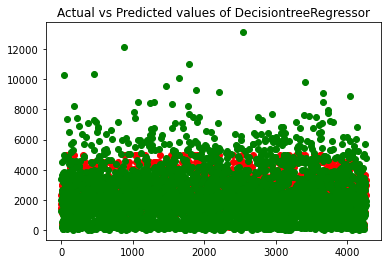

In [56]:
# Plot
a = np.arange(0,len(t_pred))

plt.scatter(a,t_pred,color='r')
plt.scatter(a,y_test,color='g')
plt.title('Actual vs Predicted values of DecisiontreeRegressor')
plt.show()

**Interpretation**:
- On using decision tree regressor for prediction of sales we get performance of about 46%.
- We used Grid Search hyperparameter tuning to get best parameters for the model.
- On using the obtained best estimators for the model we get a performance of about 51%.

## Random Forest Regressor

### Model Building & Fitting

In [57]:
rf = RandomForestRegressor().fit(X_train,y_train)

### Predictions

In [58]:
r_pred = rf.predict(X_test)
r_pred

array([1250.568811, 1916.884806, 2152.141907, ..., 3574.620278,
       2999.036178, 2158.533587])

### Performance Check

In [59]:
rf_train = rf.score(X_train,y_train)
rf_test = rf.score(X_test,y_test)

print(f"Performance of train dataset = {np.round(rf_train*100)} %")
print(f"Performance of test dataset  = {np.round(rf_test*100)} %")

Performance of train dataset = 90.0 %
Performance of test dataset  = 38.0 %


### Evaluation Metrics

In [60]:
MSE2 = np.round(mean_squared_error(y_test,r_pred)*100)
RMSE2 = np.round(mean_squared_error(y_test, r_pred, squared=False)*100)
MAE2 = np.round(mean_absolute_error(y_test,r_pred)*100)
MAPE2 = np.round(mean_absolute_percentage_error(y_test,r_pred))
r22 = np.round(r2_score(y_test,r_pred)*100)

print(f'MSE  : {MSE2} %')
print(f'RMSE : {RMSE2} %')
print(f'MAE  : {MAE2} %')
print(f'MAPE : {MAPE} %')
print(f'R_2  : {r22} %')

MSE  : 137772397.0 %
RMSE : 117376.0 %
MAE  : 80127.0 %
MAPE : 1.0 %
R_2  : 38.0 %


**We can use Grid Search to get best parameters for the model as the model seems to be overfitting.**

### Using Grid Search to find best parameters (Hyperparameter Tuning)

In [61]:
# setting parameters
params = {
    'max_depth': [2,3,5,10,20,25],
    'min_samples_leaf': [5,10,20,25,30,50],
    'n_estimators': [5,10,15,20,25,30]
}

In [62]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="r2")

In [63]:
# Fitting the train data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 25],
                         'min_samples_leaf': [5, 10, 20, 25, 30, 50],
                         'n_estimators': [5, 10, 15, 20, 25, 30]},
             scoring='r2', verbose=1)

In [64]:
# Best score
grid_search.best_score_

0.5060635789260253

In [65]:
# best estimator
grid_search.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=50, n_estimators=30)

## RandomForestRegressor model using optimum parameters

### Model Building using optimum parameters

In [66]:
rf1 = RandomForestRegressor(max_depth=5, min_samples_leaf=30, n_estimators=15)
rf1.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=30, n_estimators=15)

### Prediction

In [67]:
pred_rf=rf1.predict(X_test)

### Performance Check

In [68]:
rf1_train = rf1.score(X_train,y_train)
rf1_test = rf1.score(X_test,y_test)

print(f"Performance of train dataset = {np.round(rf1_train*100)} %")
print(f"Performance of test dataset  = {np.round(rf1_test*100)} %")

Performance of train dataset = 51.0 %
Performance of test dataset  = 51.0 %


### Evaluation Metrics

In [69]:
MSE_2 = np.round(mean_squared_error(y_test,pred_rf)*100)
RMSE_2 = np.round(mean_squared_error(y_test, pred_rf, squared=False)*100)
MAE_2 = np.round(mean_absolute_error(y_test,pred_rf)*100)
MAPE_2 = np.round(mean_absolute_percentage_error(y_test,pred_rf))
r2_2 = np.round(r2_score(y_test,pred_rf)*100)

print(f'MSE  : {MSE_2} %')
print(f'RMSE : {RMSE_2} %')
print(f'MAE  : {MAE_2} %')
print(f'MAPE : {MAPE} %')
print(f'R_2  : {r2_2} %')

MSE  : 107658601.0 %
RMSE : 103759.0 %
MAE  : 71845.0 %
MAPE : 1.0 %
R_2  : 51.0 %


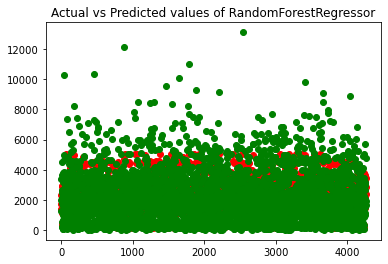

In [70]:
# Plot
a = np.arange(0,len(pred_rf))

plt.scatter(a,pred_rf,color='r')
plt.scatter(a,y_test,color='g')
plt.title('Actual vs Predicted values of RandomForestRegressor')
plt.show()

**Interpretation**:
- On using RandomForestRegressor model for prediction of sales we get a performance of about 46% but it seemed to be overfitting.
- So we use Hyperparameter tuning to get the best parameters for the model.
- On using the model with best estimators we get a performance of about 51%.

## Stacking

In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

### Defining the function for the model

In [72]:
def get_stacking():
    level0 = list()
    level0.append(('knn',KNeighborsRegressor()))
    level0.append(('dtr',DecisionTreeRegressor()))
    level0.append(('svr',SVR()))
    level1 = LinearRegression()
    model = StackingRegressor(estimators=level0,final_estimator=level1,cv=3)
    return model

### Model

In [73]:
model = get_stacking()

cv = KFold(n_splits=3, random_state=10,shuffle=True)
scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error']
st_scores = cross_validate(model,X,y,scoring=scoring,cv=cv,n_jobs=-1,error_score='raise')
st_scores

{'fit_time': array([41.27205873, 40.68605924, 41.67446256]),
 'score_time': array([10.47284055, 10.65860057,  9.74851894]),
 'test_r2': array([0.39448898, 0.38212094, 0.38712793]),
 'test_neg_mean_absolute_error': array([-790.21925919, -758.90829812, -755.38941053]),
 'test_neg_mean_squared_error': array([-1329548.01445879, -1203955.47350785, -1164377.47153119]),
 'test_neg_root_mean_squared_error': array([-1153.06028223, -1097.24904808, -1079.06323797]),
 'test_neg_mean_absolute_percentage_error': array([-0.82879103, -0.77420227, -0.77054221])}

### Evaluation Metrics

In [74]:
mse_3 = np.round(abs(st_scores['test_neg_mean_squared_error'].mean())*100)
rmse_3 = np.round(abs(st_scores['test_neg_root_mean_squared_error'].mean())*100)
mae_3 = np.round(abs(st_scores['test_neg_mean_absolute_error'].mean())*100)
mape_3 = np.round(abs(st_scores['test_neg_mean_absolute_percentage_error'].mean()))
r2_3 = np.round(st_scores['test_r2'].mean()*100)

print('MSE :',mse_3,'%')
print('RMSE:',rmse_3,'%')
print('MAE :',mae_3,'%')
print('MAPE:',mape_3,'%')
print('R_2 :',r2_3,'%')

MSE : 123262699.0 %
RMSE: 110979.0 %
MAE : 76817.0 %
MAPE: 1.0 %
R_2 : 39.0 %


**Interpretation**:
- On using Stacking model for the prediction of sales we get a performance of about 39%.

# CONCLUSION

In [75]:
pd.DataFrame([[MSE,RMSE,MAE,MAPE,r2],[MSE_1,RMSE_1,MAE_1,MAPE_1,r2_1],
              [MSE_2,RMSE_2,MAE_2,MAPE_2,r2_2],[mse_3,rmse_3,mae_3,mape_3,r2_3]],
             columns=['MSE','RMSE','MAE','MAPE','R2'],
             index=['LinearRegresssion','DecionTreeRegressor','RandomForestRegressor','StackingRegressor'])

,MSE,RMSE,MAE,MAPE,R2
LinearRegresssion,130111260.0,114066.0,82250.0,1.0,41.0
DecionTreeRegressor,107590221.0,103726.0,71768.0,1.0,51.0
RandomForestRegressor,107658601.0,103759.0,71845.0,1.0,51.0
StackingRegressor,123262699.0,110979.0,76817.0,1.0,39.0


**Conclusion**:
- On comparing all the models we could see that Decision tree regressor and Random Forest regressor with hyperparameter tuning gives a better performance of the model compared with the other models for predicting Sales of the store of this dataset.